<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/Deauthawid3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
for j in range(0,33):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='Deauth'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)
  

n is 1 and j is 21
n is 1 and j is 22
n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_21.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_22.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_23.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_24.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_25.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_26.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_27.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/1.Deauth/Deauth_32.csv"]), ignore_index=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576472 entries, 0 to 576471
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(99), int64(24), object(131)
memory usage: 1.1+ GB


In [ ]:
drop_cols = []
for i in df.columns:
    if len(df[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df.drop(drop_cols, 1, inplace=True)



Total columns with only 1 unique value: 62


In [ ]:
df.dropna(1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576472 entries, 0 to 576471
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   576472 non-null  int64  
 1   frame.number                576472 non-null  int64  
 2   frame.time                  576472 non-null  object 
 3   frame.time_delta            576472 non-null  float64
 4   frame.time_delta_displayed  576472 non-null  float64
 5   frame.time_epoch            576472 non-null  int64  
 6   frame.time_relative         576472 non-null  float64
 7   radiotap.dbm_antsignal      576472 non-null  int64  
 8   radiotap.length             576472 non-null  int64  
 9   radiotap.present.tsft       576472 non-null  object 
 10  radiotap.timestamp.ts       576472 non-null  int64  
 11  wlan.duration               576472 non-null  int64  
 12  wlan.fc.ds                  576472 non-null  object 
 13  wlan.fc.frag  

In [ ]:
print([df['frame.time'].head()])

[0    Dec 18- 2020 17:49:54.921281000 GTB Standard Time
1    Dec 18- 2020 17:49:54.921356000 GTB Standard Time
2    Dec 18- 2020 17:49:54.921401000 GTB Standard Time
3    Dec 18- 2020 17:49:54.921525000 GTB Standard Time
4    Dec 18- 2020 17:49:54.921667000 GTB Standard Time
Name: frame.time, dtype: object]


In [ ]:
df = df.drop('frame.time',1)

In [ ]:
df.head()

,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.dbm_antsignal,radiotap.length,radiotap.present.tsft,radiotap.timestamp.ts,wlan.duration,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.ra,wlan_radio.duration,wlan_radio.data_rate,wlan_radio.signal_dbm,wlan_radio.phy,Label
0,88,1050001,0.000002,0.000002,1608306595,416.438681,-184,56,1-0-0,3440495010,0,0x00000000,0,0,0,0,0,1,0,9,0c:9d:92:54:fe:34,32,24.0,-68,5,Normal
1,76,1050002,0.000075,0.000075,1608306595,416.438756,-199,56,1-0-0,3440495093,158,0x00000000,0,0,0,0,0,1,0,11,0c:9d:92:54:fe:34,28,24.0,-66,5,Normal
2,70,1050003,0.000045,0.000045,1608306595,416.438801,-113,56,1-0-0,3440495139,104,0x00000000,0,0,0,0,0,1,0,12,00:c0:ca:a8:29:56,28,24.0,-36,5,Normal
3,88,1050004,0.000124,0.000124,1608306595,416.438925,-114,56,1-0-0,3440495263,62,0x00000000,0,0,0,0,0,1,0,9,00:c0:ca:a8:29:56,32,24.0,-36,5,Normal
4,76,1050005,0.000142,0.000142,1608306595,416.439067,-182,56,1-0-0,3440495401,166,0x00000000,0,0,0,0,0,1,0,11,0c:9d:92:54:fe:34,28,24.0,-57,5,Normal


In [ ]:
df['radiotap.present.tsft'] = df['radiotap.present.tsft'].str.replace('-','').astype('float32')

In [ ]:
df['wlan.fc.ds'] = df['wlan.fc.ds'].str.replace('x','').astype('float32')

In [ ]:
df.head()

,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.dbm_antsignal,radiotap.length,radiotap.present.tsft,radiotap.timestamp.ts,wlan.duration,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.ra,wlan_radio.duration,wlan_radio.data_rate,wlan_radio.signal_dbm,wlan_radio.phy,Label
0,88,1050001,0.000002,0.000002,1608306595,416.438681,-184,56,100.0,3440495010,0,0.0,0,0,0,0,0,1,0,9,0c:9d:92:54:fe:34,32,24.0,-68,5,Normal
1,76,1050002,0.000075,0.000075,1608306595,416.438756,-199,56,100.0,3440495093,158,0.0,0,0,0,0,0,1,0,11,0c:9d:92:54:fe:34,28,24.0,-66,5,Normal
2,70,1050003,0.000045,0.000045,1608306595,416.438801,-113,56,100.0,3440495139,104,0.0,0,0,0,0,0,1,0,12,00:c0:ca:a8:29:56,28,24.0,-36,5,Normal
3,88,1050004,0.000124,0.000124,1608306595,416.438925,-114,56,100.0,3440495263,62,0.0,0,0,0,0,0,1,0,9,00:c0:ca:a8:29:56,32,24.0,-36,5,Normal
4,76,1050005,0.000142,0.000142,1608306595,416.439067,-182,56,100.0,3440495401,166,0.0,0,0,0,0,0,1,0,11,0c:9d:92:54:fe:34,28,24.0,-57,5,Normal


In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal    161341
Deauth     11601
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)


In [ ]:
 from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

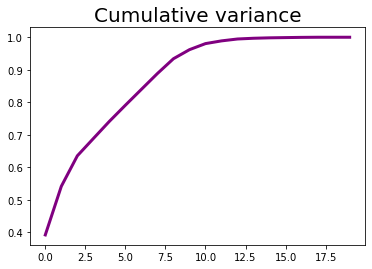

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
frame.len,0.894510,-0.007299,0.115909,-0.064510,0.021288,-0.008473,-0.004305,-0.025322,0.018392,0.300144,-0.009933,-0.231274,-0.184033,0.021091,0.051877,-0.001915,-0.001287,0.000284,0.000004,-8.754567e-07
frame.number,0.051180,-0.992639,-0.049092,0.002337,0.002271,0.005315,-0.001238,0.008891,0.006949,-0.012502,0.000972,-0.001245,0.003270,0.002855,0.005651,-0.010984,0.095588,0.002381,0.000019,8.298824e-07
frame.time_epoch,0.061164,-0.995907,-0.041651,-0.000577,0.004976,0.004959,-0.003131,0.003622,0.012516,-0.011150,0.004556,-0.001116,0.000765,-0.002086,-0.001941,0.005093,-0.047712,-0.001551,-0.000007,2.764356e-03
radiotap.dbm_antsignal,0.379653,-0.056379,0.907359,0.020250,-0.024704,-0.057338,0.024943,0.023747,-0.057664,-0.127615,0.008044,0.018694,0.007549,0.000662,0.004298,0.007306,-0.002134,0.061114,0.000019,4.211730e-07
radiotap.length,0.958159,0.034314,-0.110061,-0.079476,0.021834,0.014792,-0.000727,0.048151,0.041346,-0.046917,-0.109527,0.081179,-0.052872,-0.183723,0.014754,-0.006881,0.000896,0.000209,0.000211,-5.496920e-07


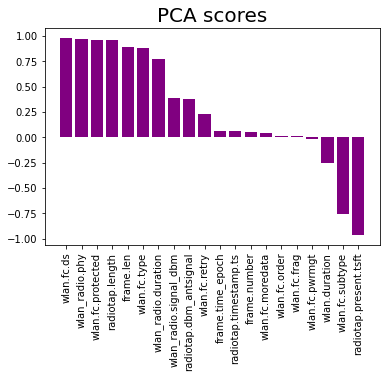

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()